In [2]:
import polars as pl
import numpy as np

# 读取数据
data = pl.read_parquet("hourly_data.pa")

df = data.sort('open_time').sort("symbol")

N = 30

df = df.with_columns([
    (pl.col('volume') - pl.col('taker_buy_volume')).alias('taker_sell_volume'),
    (pl.col('quote_volume') - pl.col('taker_buy_quote_volume')).alias('taker_sell_quote_volume'),
    (pl.col('taker_buy_quote_volume') / pl.col('quote_volume')).alias('taker_buy_ratio'),
    (pl.col('taker_buy_quote_volume').rolling_mean(N).over('symbol') / (pl.col('taker_buy_quote_volume').rolling_std(N).over('symbol'))).alias
    ('meg_taker_buy_quote'),
    (pl.col('close') / (pl.col('close').shift(1).over('symbol')) - 1).alias('return')
])

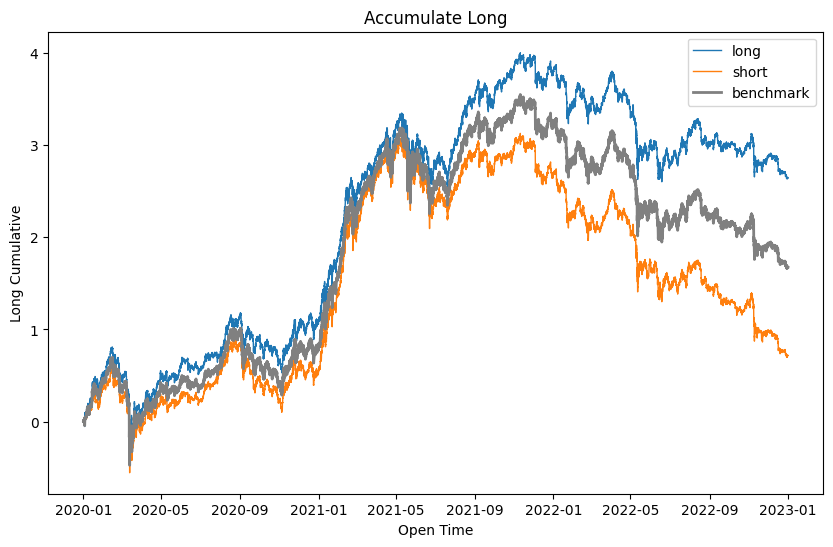

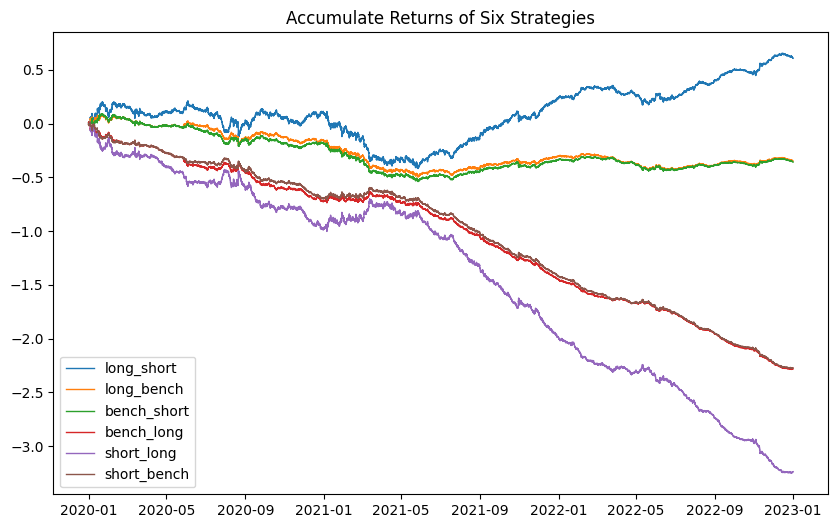

long: 
ann_return = 0.8795  sharpe = 0.7935  maxdd = 0.6634  calmar_ratio = 1.3258  

short: 
ann_return = 0.2386  sharpe = 0.2206  maxdd = 0.7183  calmar_ratio = 0.3322  

bench: 
ann_return = 0.5575  sharpe = 0.513  maxdd = 0.6895  calmar_ratio = 0.8085  

long_short: 
ann_return = 0.2029  sharpe = 0.7387  maxdd = 0.5193  calmar_ratio = 0.3908  

long_bench: 
ann_return = -0.116  sharpe = -0.8248  maxdd = 0.5331  calmar_ratio = -0.2176  

bench_long: 
ann_return = -0.76  sharpe = -5.4031  maxdd = 2.2665  calmar_ratio = -0.3353  

short_long: 
ann_return = -1.0789  sharpe = -3.928  maxdd = 3.2231  calmar_ratio = -0.3347  

short_bench: 
ann_return = -0.7569  sharpe = -5.3907  maxdd = 2.2675  calmar_ratio = -0.3338  

bench_short: 
ann_return = -0.1191  sharpe = -0.8481  maxdd = 0.5774  calmar_ratio = -0.2062  



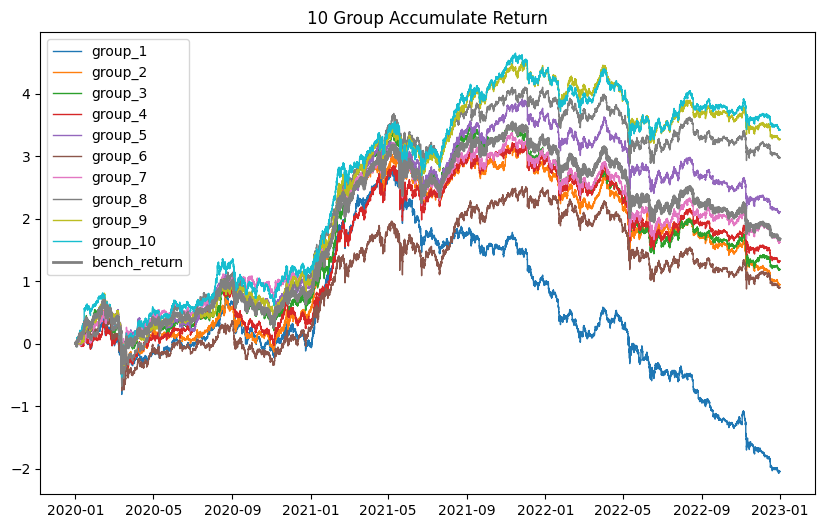

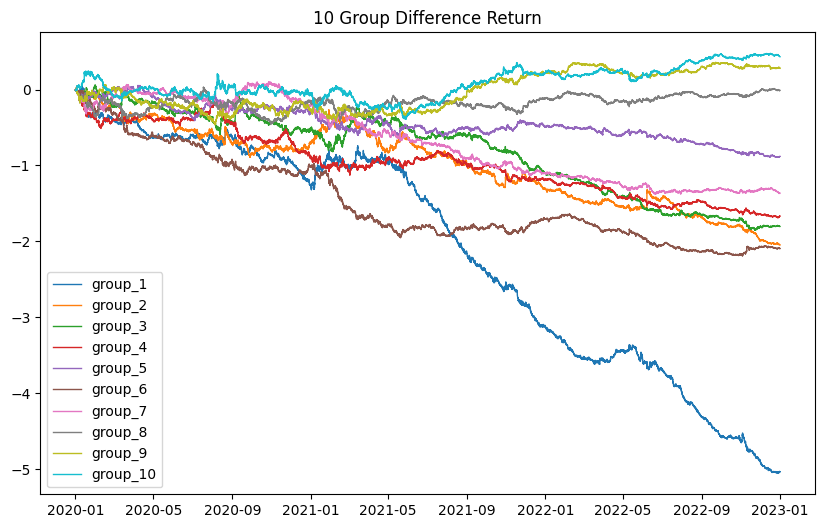

group_1: 
ann_return = -0.6821  sharpe = -0.5941  maxdd = 1.2831  calmar_ratio = -0.5316  

group_2: 
ann_return = 0.3134  sharpe = 0.2726  maxdd = 0.7818  calmar_ratio = 0.4008  

group_3: 
ann_return = 0.3947  sharpe = 0.347  maxdd = 0.6947  calmar_ratio = 0.5682  

group_4: 
ann_return = 0.44  sharpe = 0.3926  maxdd = 0.7738  calmar_ratio = 0.5686  

group_5: 
ann_return = 0.7026  sharpe = 0.6219  maxdd = 0.6611  calmar_ratio = 1.0627  

group_6: 
ann_return = 0.2975  sharpe = 0.2639  maxdd = 0.8368  calmar_ratio = 0.3556  

group_7: 
ann_return = 0.5407  sharpe = 0.4783  maxdd = 0.6563  calmar_ratio = 0.8238  

group_8: 
ann_return = 0.9915  sharpe = 0.8683  maxdd = 0.8053  calmar_ratio = 1.2312  

group_9: 
ann_return = 1.089  sharpe = 0.9434  maxdd = 0.665  calmar_ratio = 1.6375  

group_10: 
ann_return = 1.1394  sharpe = 0.977  maxdd = 0.7437  calmar_ratio = 1.5321  

-----------------------------------------
group_difference_1: 
ann_return = -1.6776  sharpe = -3.701  maxdd = 4.

In [3]:
factors = df.select(['open_time', 'symbol', 'meg_taker_buy_quote'])

from factor_analysis.factor_analysis import FactorAnalysis

# 使用示例
analysis = FactorAnalysis(factors, data)
analysis.run_full_analysis()